In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/income_data.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  target          32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


## Testing basic assumptions

<AxesSubplot:xlabel='age', ylabel='education-num'>

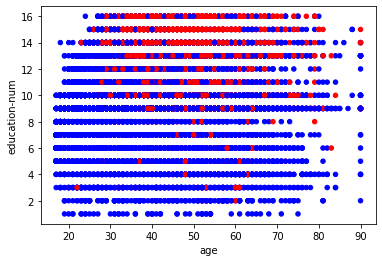

In [6]:
df.plot.scatter('age', 'education-num', c=['r' if t == 1 else 'b' for t in df.target])

In [7]:
# balance in the target
df['target'].mean()

0.2408095574460244

<AxesSubplot:ylabel='Frequency'>

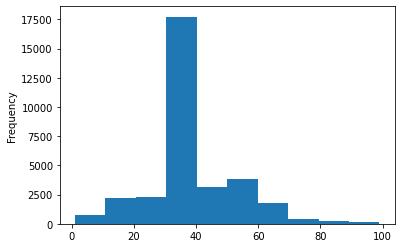

In [8]:
df['hours-per-week'].plot.hist()

In [9]:
df[df['hours-per-week'] < 40]['target'].mean()

0.09506634033234575

In [10]:
df[df['hours-per-week'] == 40]['target'].mean()

0.2133797726227246

In [11]:
df[df['hours-per-week'] > 40]['target'].mean()

0.4024632084333577

In [13]:
pd.cut(df['hours-per-week'], [0, 39, 40, 100])

0        (39, 40]
1         (0, 39]
2        (39, 40]
3        (39, 40]
4        (39, 40]
           ...   
32556     (0, 39]
32557    (39, 40]
32558    (39, 40]
32559     (0, 39]
32560    (39, 40]
Name: hours-per-week, Length: 32561, dtype: category
Categories (3, interval[int64, right]): [(0, 39] < (39, 40] < (40, 100]]

In [14]:
df.groupby(pd.cut(df['hours-per-week'], [0, 39, 40, 100]))['target'].mean()

hours-per-week
(0, 39]      0.095066
(39, 40]     0.213380
(40, 100]    0.402463
Name: target, dtype: float64

<AxesSubplot:ylabel='Frequency'>

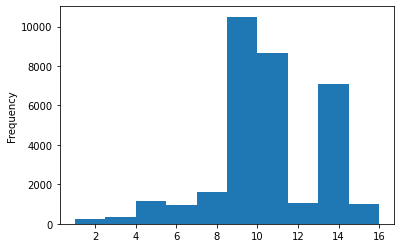

In [15]:
df['education-num'].plot.hist()

In [16]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [19]:
df.groupby('education')['target'].mean().sort_values()

education
 Preschool       0.000000
 1st-4th         0.035714
 5th-6th         0.048048
 11th            0.051064
 9th             0.052529
 7th-8th         0.061920
 10th            0.066452
 12th            0.076212
 HS-grad         0.159509
 Some-college    0.190235
 Assoc-acdm      0.248360
 Assoc-voc       0.261216
 Bachelors       0.414753
 Masters         0.556587
 Prof-school     0.734375
 Doctorate       0.740920
Name: target, dtype: float64

<AxesSubplot:xlabel='education'>

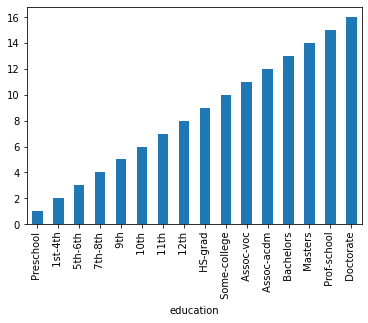

In [21]:
df.groupby('education')['education-num'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='education'>

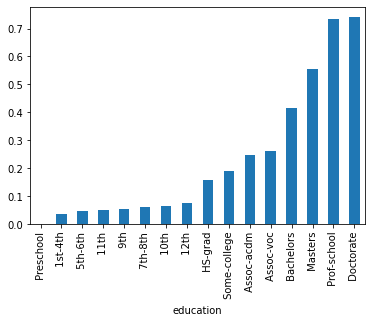

In [22]:
df.groupby('education')['target'].mean().sort_values().plot.bar()

# Training a model